In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.37'

In [19]:
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

## Load in specra, and combine

In [20]:
import os.path
from os import path
if path.exists('Discarded_df.xlsx'):
    discard=pd.read_excel('Discarded_df.xlsx')
else:
    discard=None
if path.exists('Weak_Diads.xlsx'):
    grp1=pd.read_excel('Weak_Diads.xlsx')
else:
    grp1=None
if path.exists('Medium_Diads.xlsx'):
    grp2=pd.read_excel('Medium_Diads.xlsx')
else:
    grp2=None
if path.exists('Strong_Diads.xlsx'):
    grp3=pd.read_excel('Strong_Diads.xlsx')
else:
    grp3=None
df2=pd.concat([grp1, grp2, grp3], axis=0)
if discard is not None:
    discard_cols=discard[discard.columns.intersection(df2.columns)]
    df2=pd.concat([df2, discard_cols])

In [21]:
df2

,Unnamed: 0,filename,Splitting,Diad1_Combofit_Cent,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Residual_Diad1,Diad1_Prop_Lor,...,Diad2_refit,HB1_Cent,HB1_Area,HB1_Sigma,HB2_Cent,HB2_Area,HB2_Sigma,C13_Cent,C13_Area,C13_Sigma
0,0,10 MP2_3_FIB_5mW,103.535295,1284.541846,363.414013,1284.541846,759.759630,0.762553,3.487157,0.695593,...,Flagged Warnings:,NaN,NaN,NaN,1409.362249,114.525472,1.047253,NaN,NaN,NaN
1,0,14 MP2_3_FIC_5mW,103.549930,1284.530708,218.266423,1284.530708,461.916443,0.781237,2.158956,0.669199,...,Flagged Warnings:,NaN,NaN,NaN,1409.434280,73.502861,0.912444,NaN,NaN,NaN
2,0,17 MP2_3_FID_5mW,103.500912,1284.632144,78.784892,1284.632144,147.545650,0.699242,1.885001,0.640366,...,Flagged Warnings:,NaN,NaN,NaN,1409.323644,32.134641,0.809932,NaN,NaN,NaN
3,0,18 MP2_3_FID_8mW,103.573458,1284.567779,75.003801,1284.567779,150.925348,0.730226,1.622749,0.710241,...,Flagged Warnings:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,55 MP2_7_FIA_12mW_heated_peaks,103.398199,1284.748475,167.262805,1284.748475,382.554104,0.730131,3.328497,1.000000,...,Flagged Warnings:,NaN,NaN,NaN,1409.550075,69.520883,0.982268,NaN,NaN,NaN
5,0,56 MP2_7_FIA_5mW_21V,103.427670,1284.699997,67.130071,1284.699997,142.542717,0.700574,1.826708,0.931240,...,Flagged Warnings:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,57 MP2_7_FIA_5mW_22V,103.474335,1284.645320,61.930551,1284.645320,160.330362,0.826491,1.923980,1.000000,...,Flagged Warnings:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,07 MP2_3_FIA_50X_8mW,103.499354,1284.649873,384.805224,1284.649923,789.852309,0.758907,2.514596,0.661278,...,Flagged Warnings:,1264.367622,117.834823,1.533361,1409.499448,150.142216,0.936660,1370.039594,2.284338,0.284365
1,0,08 MP2_3_FIA_50X_5mW,85.255890,1284.559079,519.766264,1284.559129,1075.605449,0.753865,2.311366,0.697132,...,Flagged Warnings:,1264.355161,150.670701,1.520643,1388.087010,1617.406432,0.603207,-998.890824,16.371453,1.808352
2,0,11 MP2_3_FIB_8mW,103.548428,1284.554538,593.757789,1284.554588,1208.209618,0.753977,2.146530,0.655736,...,Flagged Warnings:,1264.357062,156.604155,1.277035,1409.520992,206.313068,0.663518,1368.999956,3.481810,0.423924


## First, get the metadata for this day

In [22]:
# Put the common string you can in all your Ne lines here
ID_str='_'
file_ext_meta='txt' # Will only take files of this type 
diad_meta=pf.get_diad_files(path=meta_path,
file_ext='txt', exclude_str='N', 
            exclude_str_2='FG', 
            exclude_str_3='Cap',
                            exclude_str_4='window',
            exclude_type='.png',   sort=True)
diad_meta

['019 MP2_3_FIA_50X.txt',
 '020 MP2_3_FIA_50X_8mW.txt',
 '021 MP2_3_FIA_50X_5mW.txt',
 '023 MP2_3_FIA_andB_20X.txt',
 '024 MP2_3_FIB_50X_belowFIA.txt',
 '025 MP2_3_FIB_5mW.txt',
 '026 MP2_3_FIB_8mW.txt',
 '027 MP2_3_FIC_20X.txt',
 '028 MP2_3_FIC_50X.txt',
 '030 MP2_3_FIC_8mW.txt',
 '031 MP2_3_FIC_5mW.txt',
 '032 MP2_3_FIC_5mW_r1.txt',
 '034 MP2_3_FID_20X.txt',
 '035 MP2_3_FID_50X.txt',
 '036 MP2_3_FID_5mW.txt',
 '037 MP2_3_FID_8mW.txt',
 '050 MP2_4_FIA_20X.txt',
 '051 MP2_4_FIA_50X.txt',
 '052 MP2_4_FIA_12mW.txt',
 '053 MP2_4_FIA_5mW.txt',
 '106 MP2_7_FIA_20X.txt',
 '107 MP2_7_FIA_50X.txt',
 '108 MP2_7_FIA_12mW_heated_peaks.txt',
 '109 MP2_7_FIA_5mW_21V.txt',
 '110 MP2_7_FIA_5mW_22V.txt',
 '121 MP2_8a_xstal1_FIA_20X.txt',
 '122 MP2_8a_xstal1_FIA_50X.txt',
 '123 MP2_8a_xstal1_FIA_5mW.txt',
 '124 MP2_8a_xstal1_FIB_50X.txt',
 '126 MP2_8a_xstal1_FIB_5mW.txt',
 '127 MP2_8a_xstal1_FIC_50x.txt',
 '128 MP2_8a_xstal1_FIC_5mW.txt',
 '133 MP2_8a_xstal1_FID_MIB_20X.txt',
 '134 MP2_8a_xstal1_FID_50

## Now get all the important information out of the metadata files

In [23]:
meta=pf.stitch_metadata_in_loop(path=meta_path, 
Allfiles=diad_meta, prefix=False,
trupower=False)
meta['filename'].iloc[0]

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 42.13it/s]

Done


'020 MP2_3_FIA_50X_8mW.txt'

## Then get a simple file name you can stitch with the spectra

In [24]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=True, str_prefix=" ",
   file_type='.txt')
# Checks they are all unique
file_m[0]

'MP2_3_FIA_50X_8mW'

## Now get filename from spectra into same form as metadata

In [25]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    prefix=True, str_prefix=" ",
    names=df2['filename'].reset_index(drop=True),
   file_type='.txt')

file_s

array(['MP2_3_FIB_5mW', 'MP2_3_FIC_5mW', 'MP2_3_FID_5mW', 'MP2_3_FID_8mW',
       'MP2_7_FIA_12mW_heated_peaks', 'MP2_7_FIA_5mW_21V',
       'MP2_7_FIA_5mW_22V', 'MP2_3_FIA_50X_8mW', 'MP2_3_FIA_50X_5mW',
       'MP2_3_FIB_8mW', 'MP2_3_FIC_8mW', 'MP2_3_FIC_5mW_r1',
       'MP2_4_FIA_12mW', 'MP2_4_FIA_5mW', 'MP2_8a_xstal1_FIA_5mW',
       'MP2_8a_xstal1_FIB_5mW', 'MP2_8a_xstal1_FIC_5mW',
       'MP2_8a_xstal1_FID_12mW'], dtype=object)

In [26]:
# Combining them together
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')

In [27]:
from pickle import load
import pickle
import os
pickle_path=os.getcwd()
file_pkl=pickle_path + '/' + 'Ne_Line_Regression_Example_cali.pck'
with open(file_pkl, 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

In [28]:
df_combo['Ne_Correction']=my_loaded_model(df_combo['sec since midnight'])
df_combo.insert(1,'Corrected_Splitting', df_combo['Ne_Correction']*df_combo['Splitting'])

In [29]:
df_combo

,Unnamed: 0,Corrected_Splitting,filename_x,Splitting,Diad1_Combofit_Cent,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Residual_Diad1,...,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Ne_Correction
0,0,103.308273,10 MP2_3_FIB_5mW,103.535295,1284.541846,363.414013,1284.541846,759.759630,0.762553,3.487157,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",9:24:10 AM\n,33850.0,1325.004,0.997807
1,0,103.322419,14 MP2_3_FIC_5mW,103.549930,1284.530708,218.266423,1284.530708,461.916443,0.781237,2.158956,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",9:39:53 AM\n,34793.0,1325.004,0.997803
2,0,103.273233,17 MP2_3_FID_5mW,103.500912,1284.632144,78.784892,1284.632144,147.545650,0.699242,1.885001,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",9:49:32 AM\n,35372.0,1325.004,0.997800
3,0,103.345514,18 MP2_3_FID_8mW,103.573458,1284.567779,75.003801,1284.567779,150.925348,0.730226,1.622749,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",9:53:16 AM\n,35596.0,1325.004,0.997799
4,0,103.166514,55 MP2_7_FIA_12mW_heated_peaks,103.398199,1284.748475,167.262805,1284.748475,382.554104,0.730131,3.328497,...,16.0,NaN,45.0,2.0,50.0,"['0h', '2m', '15s']",12:40:40 PM\n,45640.0,1325.004,0.997759
5,0,103.195811,56 MP2_7_FIA_5mW_21V,103.427670,1284.699997,67.130071,1284.699997,142.542717,0.700574,1.826708,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",12:45:47 PM\n,45947.0,1325.004,0.997758
6,0,103.242248,57 MP2_7_FIA_5mW_22V,103.474335,1284.645320,61.930551,1284.645320,160.330362,0.826491,1.923980,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",12:51:41 PM\n,46301.0,1325.004,0.997757
7,0,103.272776,07 MP2_3_FIA_50X_8mW,103.499354,1284.649873,384.805224,1284.649923,789.852309,0.758907,2.514596,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",9:11:51 AM\n,33111.0,1325.004,0.997811
8,0,85.069163,08 MP2_3_FIA_50X_5mW,85.255890,1284.559079,519.766264,1284.559129,1075.605449,0.753865,2.311366,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",9:15:25 AM\n,33325.0,1325.004,0.997810
9,0,103.321284,11 MP2_3_FIB_8mW,103.548428,1284.554538,593.757789,1284.554588,1208.209618,0.753977,2.146530,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",9:27:20 AM\n,34040.0,1325.004,0.997806


In [30]:
Density=pf.calculate_density_cornell(temp='SupCrit', Split=df_combo['Corrected_Splitting'])
df_combo.insert(0,'Density', Density['Preferred D'])

In [31]:
depth=pf.convert_co2_density_depth_Coolprop(T_K=1150+273.15,
    CO2_dens_gcm3=df_combo['Density'],
    crust_dens_kgm3='ryan_lerner', output='df',
    g=9.81)
depth

,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,input_T_K,input_CO2_dens_gcm3
0,0.722912,72.291174,3.163349,ryan_lerner,1423.15,0.227818
1,0.745460,74.545980,3.256168,ryan_lerner,1423.15,0.233739
2,0.668480,66.847962,2.937949,ryan_lerner,1423.15,0.213258
3,0.783008,78.300778,3.410031,ryan_lerner,1423.15,0.243457
4,0.514295,51.429472,2.288933,ryan_lerner,1423.15,0.169892
5,0.554973,55.497339,2.461712,ryan_lerner,1423.15,0.181646
6,0.621970,62.197046,2.743841,ryan_lerner,1423.15,0.200513
7,0.667782,66.778241,2.935049,ryan_lerner,1423.15,0.213069
8,NaN,NaN,NaN,ryan_lerner,1423.15,-6.637542
9,0.743639,74.363850,3.248683,ryan_lerner,1423.15,0.233263


(array([2., 0., 1., 2., 1., 4., 1., 0., 2., 2.]),
 array([2.28893293, 2.4629498 , 2.63696666, 2.81098353, 2.98500039,
        3.15901725, 3.33303412, 3.50705098, 3.68106785, 3.85508471,
        4.02910158]),
 <BarContainer object of 10 artists>)

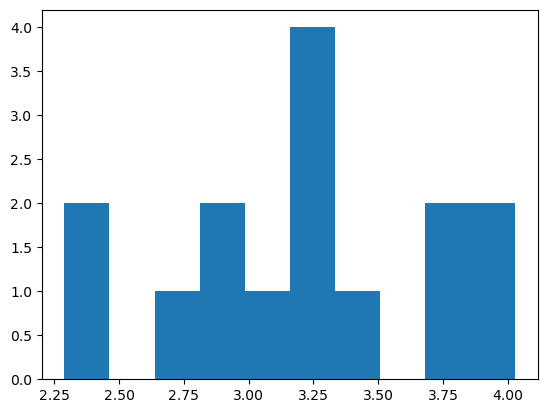

In [32]:
plt.hist(depth['Depth (km)'])

In [34]:
df_combo_sort=df_combo.sort_values(by=['filename_x'])
df_combo_sort.to_excel('30_11_2022.xlsx')


In [35]:
df_combo

,Density,Unnamed: 0,Corrected_Splitting,filename_x,Splitting,Diad1_Combofit_Cent,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,...,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Ne_Correction
0,0.227818,0,103.308273,10 MP2_3_FIB_5mW,103.535295,1284.541846,363.414013,1284.541846,759.759630,0.762553,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",9:24:10 AM\n,33850.0,1325.004,0.997807
1,0.233739,0,103.322419,14 MP2_3_FIC_5mW,103.549930,1284.530708,218.266423,1284.530708,461.916443,0.781237,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",9:39:53 AM\n,34793.0,1325.004,0.997803
2,0.213258,0,103.273233,17 MP2_3_FID_5mW,103.500912,1284.632144,78.784892,1284.632144,147.545650,0.699242,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",9:49:32 AM\n,35372.0,1325.004,0.997800
3,0.243457,0,103.345514,18 MP2_3_FID_8mW,103.573458,1284.567779,75.003801,1284.567779,150.925348,0.730226,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",9:53:16 AM\n,35596.0,1325.004,0.997799
4,0.169892,0,103.166514,55 MP2_7_FIA_12mW_heated_peaks,103.398199,1284.748475,167.262805,1284.748475,382.554104,0.730131,...,16.0,NaN,45.0,2.0,50.0,"['0h', '2m', '15s']",12:40:40 PM\n,45640.0,1325.004,0.997759
5,0.181646,0,103.195811,56 MP2_7_FIA_5mW_21V,103.427670,1284.699997,67.130071,1284.699997,142.542717,0.700574,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",12:45:47 PM\n,45947.0,1325.004,0.997758
6,0.200513,0,103.242248,57 MP2_7_FIA_5mW_22V,103.474335,1284.645320,61.930551,1284.645320,160.330362,0.826491,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",12:51:41 PM\n,46301.0,1325.004,0.997757
7,0.213069,0,103.272776,07 MP2_3_FIA_50X_8mW,103.499354,1284.649873,384.805224,1284.649923,789.852309,0.758907,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",9:11:51 AM\n,33111.0,1325.004,0.997811
8,-6.637542,0,85.069163,08 MP2_3_FIA_50X_5mW,85.255890,1284.559079,519.766264,1284.559129,1075.605449,0.753865,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",9:15:25 AM\n,33325.0,1325.004,0.997810
9,0.233263,0,103.321284,11 MP2_3_FIB_8mW,103.548428,1284.554538,593.757789,1284.554588,1208.209618,0.753977,...,16.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",9:27:20 AM\n,34040.0,1325.004,0.997806
